In [1]:
# Import Libraries

from statsbombpy import sb

## Math Operations
import numpy as np
import math

## Data Preprocessing
import pandas as pd

## Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import get_cmap
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.colors import to_rgba
from matplotlib import rcParams
import seaborn as sns
import networkx as nx
from PIL import Image
from highlight_text import ax_text, fig_text
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, VerticalPitch, add_image, FontManager, Sbopen
import mplsoccer
from svgpathtools import svg2paths
from svgpath2mpl import parse_path

## Requests and downloads
import tqdm
import requests
from urllib.request import urlopen

## Filter warning
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
rcParams['text.color'] = '#c7d5cc'  # set the default text color

# fontmanager for google font (robotto)
robotto_regular = FontManager()

In [3]:
# get event dataframe for game 3795506
parser = Sbopen()
df, related, freeze, tactics = parser.event(3795506)

In [16]:
df

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_committed_card_id,foul_committed_card_name,substitution_replacement_id,substitution_replacement_name,shot_one_on_one,foul_committed_offensive,pass_miscommunication,shot_open_goal,pass_cut_back,injury_stoppage_in_chain
0,0a58f547-aa52-4d0f-82a7-eda2a2794016,1,1,00:00:00,0,0,1,0.000000,3795506,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a547024f-9000-4dc5-866b-fbd88b137810,2,1,00:00:00,0,0,1,0.000000,3795506,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4c072ece-eef4-4201-a446-4d5cd8aa5d96,3,1,00:00:00,0,0,1,0.000000,3795506,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c0dd5679-16c3-4b99-8f04-fae3a74f0f83,4,1,00:00:00,0,0,1,0.000000,3795506,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0aee931f-9614-4879-b3e8-fd9d7cc80c59,5,1,00:00:00.286000,0,0,2,0.663637,3795506,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,1cb02283-e738-4294-99bc-531d265dddac,4792,5,00:06:57.938000,126,57,221,0.000000,3795506,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4792,572d5967-c7c5-4d86-ab60-c0b841a63a4a,4793,5,00:07:43.973000,127,43,222,0.306645,3795506,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4793,1d5fcee1-160c-4f09-ab7f-8fee44f31e9a,4794,5,00:07:44.279000,127,44,222,0.000000,3795506,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4794,b460f032-74e5-449d-b3da-eec37aa87495,4795,5,00:07:45.767000,127,45,222,0.000000,3795506,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# subset the pass for each team
team1, team2 = df.team_name.unique()
mask_team1 = (df.type_name == 'Pass') & (df.team_name == team1)
mask_team2 = (df.type_name == 'Pass') & (df.team_name == team2)

In [5]:
# pass info for both teams
df_pass_Italy = df.loc[mask_team1, ['x', 'y', 'end_x', 'end_y', 'outcome_name']]
mask_complete = df_pass_Italy.outcome_name.isnull()

df_pass_England = df.loc[mask_team2, ['x', 'y', 'end_x', 'end_y', 'outcome_name']]
mask_complete = df_pass_England.outcome_name.isnull()

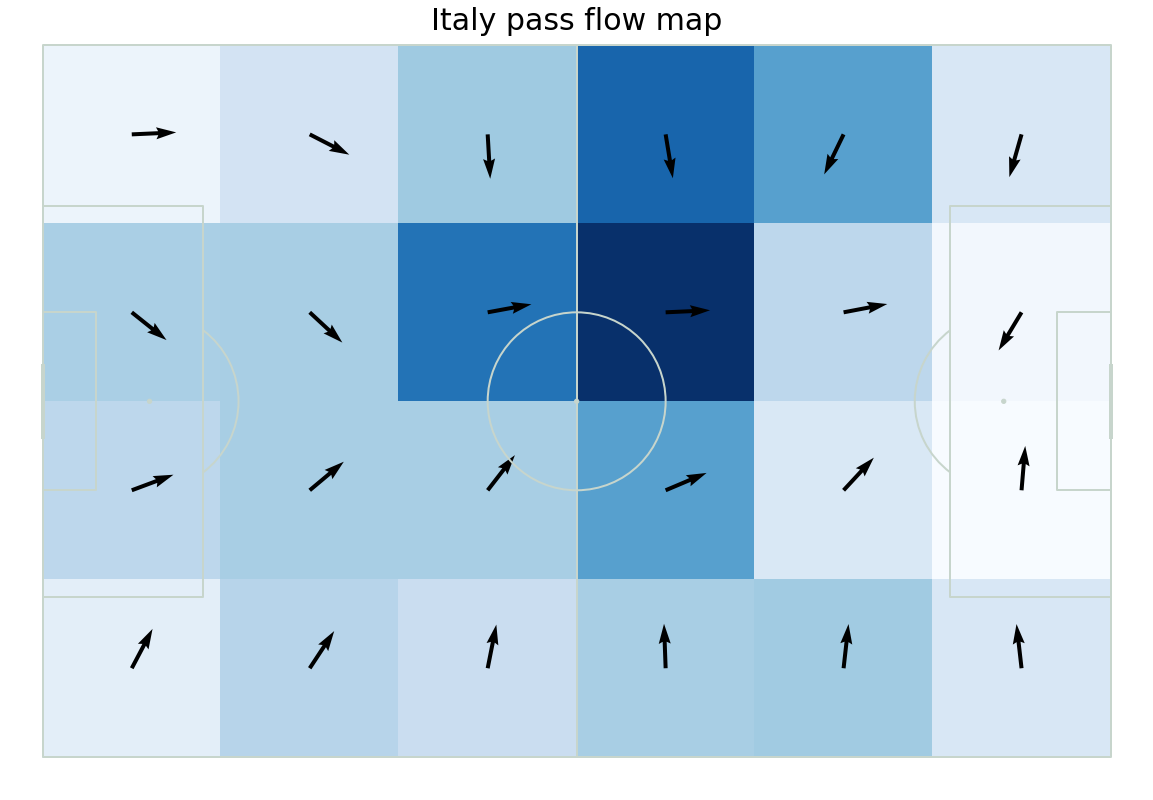

In [14]:
# Plot the pass flow map for Italy team 

pitch = Pitch(pitch_type='statsbomb',  line_zorder=2, line_color='#c7d5cc')
bins = (6, 4)

fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(df_pass_Italy.x, df_pass_Italy.y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Blues')

# plot the pass flow map with a single color ('black') and length of the arrow (5)
fm = pitch.flow(df_pass_Italy.x, df_pass_Italy.y, df_pass_Italy.end_x, df_pass_Italy.end_y,
                color='black', arrow_type='same', arrow_length=5, bins=bins, ax=ax)

ax_title = ax.set_title(f'{team1} pass flow map', fontsize=30, pad=-20, color = 'black')

plt.savefig("ITA_passflow.jpg", bbox_inches = 'tight')

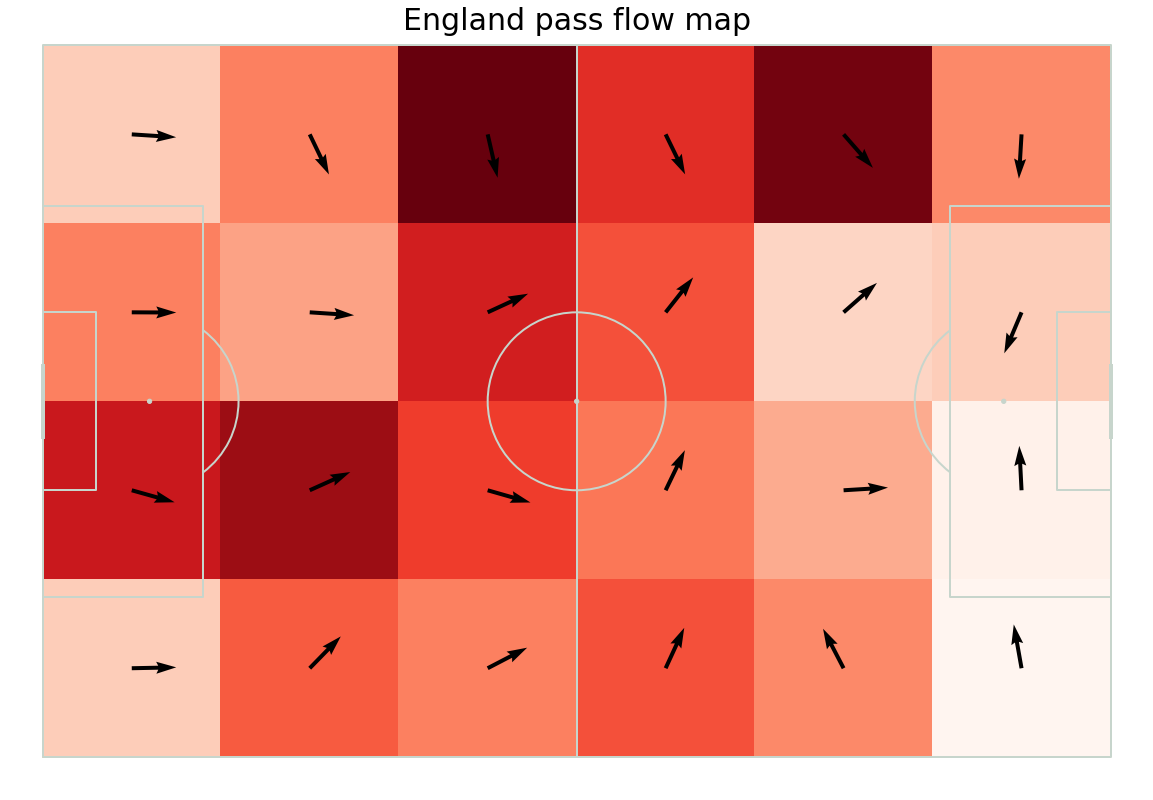

In [15]:
# Plot the pass flow map for England team 

pitch = Pitch(pitch_type='statsbomb',  line_zorder=2, line_color='#c7d5cc')
bins = (6, 4)

fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(df_pass_England.x, df_pass_England.y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Reds')

# plot the pass flow map with a single color ('black') and length of the arrow (5)
fm = pitch.flow(df_pass_England.x, df_pass_England.y, df_pass_England.end_x, df_pass_England.end_y,
                color='black', arrow_type='same', arrow_length=5, bins=bins, ax=ax)

ax_title = ax.set_title(f'{team2} pass flow map', fontsize=30, pad=-20, color = 'black')

plt.savefig("ENG_passflow.jpg", bbox_inches = 'tight')

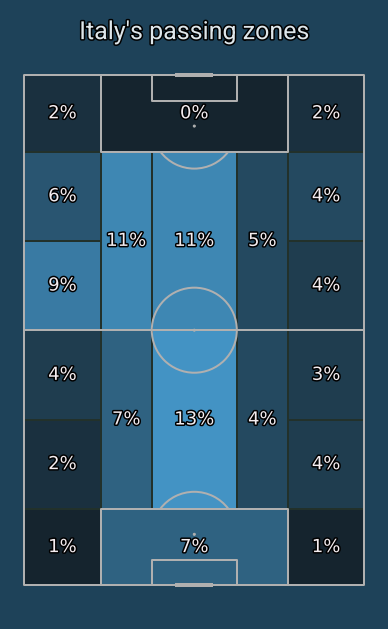

In [8]:
# Plot the passing zones for Italy team 

pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",['#15242e', '#4393c4'], N=10)
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),path_effects.Normal()]

pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#1e4259')

fig, axs = pitch.grid(endnote_height=0.03,
                      endnote_space=0,
                      title_height=0.08, 
                      title_space=0,
                      axis=False,
                      grid_height=0.84)

fig.set_facecolor('#1e4259')

# heatmap and labels
bin_statistic = pitch.bin_statistic_positional(df_pass_Italy.x, 
                                               df_pass_Italy.y, statistic='count',
                                               positional='full', 
                                               normalize=True)

pitch.heatmap_positional(bin_statistic, ax=axs['pitch'], cmap=pearl_earring_cmap, edgecolors='#22312b')

labels = pitch.label_heatmap(bin_statistic, 
                             color='#f4edf0',
                             fontsize=18,
                             ax=axs['pitch'], 
                             ha='center', 
                             va='center',
                             str_format='{:.0%}', 
                             path_effects=path_eff)

# add title
axs['title'].text(0.5, 0.5, "Italy's passing zones", color='#dee6ea',
                  va='center', ha='center', path_effects=path_eff,
                  fontproperties=robotto_regular.prop, fontsize=25)

#plt.show()
plt.savefig("ITA_passzone.jpg", bbox_inches = 'tight')

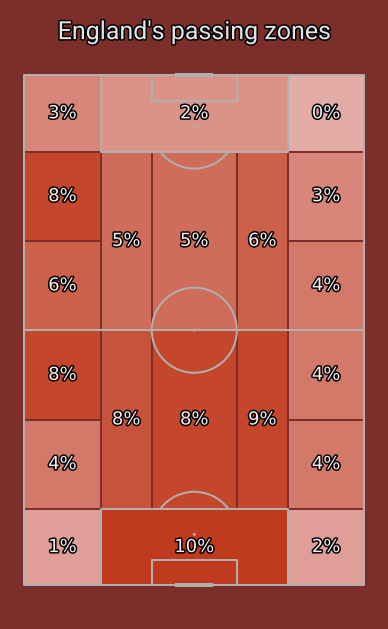

In [9]:
# Plot the passing zones for England team 

flamingo_cmap = LinearSegmentedColormap.from_list("Flamingo - 10 colors", ['#e3aca7', '#c03a1d'], N=10)

path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),path_effects.Normal()]

pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#7c2e2a')

fig, axs = pitch.grid(endnote_height=0.03,
                      endnote_space=0,
                      title_height=0.08, 
                      title_space=0,
                      axis=False,
                      grid_height=0.84)

fig.set_facecolor('#7c2e2a')

# heatmap and labels
bin_statistic = pitch.bin_statistic_positional(df_pass_England.x, 
                                               df_pass_England.y, 
                                               statistic='count',
                                               positional='full', 
                                               normalize=True)

pitch.heatmap_positional(bin_statistic, ax=axs['pitch'], cmap= flamingo_cmap, edgecolors='#7c2e2a')

labels = pitch.label_heatmap(bin_statistic, 
                             color='#f4edf0',
                             fontsize=18,
                             ax=axs['pitch'], 
                             ha='center', 
                             va='center',
                             str_format='{:.0%}', 
                             path_effects=path_eff)

# add title
axs['title'].text(0.5, 0.5, "England's passing zones", color='#dee6ea',
                  va='center', ha='center', path_effects=path_eff,
                  fontproperties=robotto_regular.prop, fontsize=25)

#plt.show()
plt.savefig("ENG_passzone.jpg", bbox_inches = 'tight')